# Initiate Discriminator Class
A network that can correctly identify fake handwritten digits from the real ones.

In [236]:
import numpy as np
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU

class Discriminator(object):
    def __init__(self, width=28, height=28, channels=1):
    	self.width = width
    	self.height = height
    	self.channels = channels
    	self.optimizers = Adam(lr=0.0002, decay=8e-9)
    	self.max_size = self.width*self.height*self.channels
    	self.shape = (self.width, self.height, self.channels)

    	self.discriminator = self.model()
    	self.discriminator.compile(loss='binary_crossentropy', optimizer=self.optimizers, metrics=['accuracy'])

    def model(self):
    	model = Sequential()
    	model.add(Flatten(input_shape=(self.shape)))
    	model.add(Dense(self.max_size, input_shape=self.shape))
    	model.add(LeakyReLU(alpha=0.2))   
    	model.add(Dense(self.max_size // 2))
    	model.add(LeakyReLU(alpha=0.2))
    	model.add(Dense(1, activation='sigmoid'))
    	return model

# Initiate Generator Class
A network that can generates fake handwritten digits to fool the discriminator network.

In [237]:
class Generator(object):
	"""docstring for Generator"""
	def __init__(self, width=28, height=28, channels=1, latent_space=128):
		self.width=width
		self.height=height
		self.channels=channels
		self.max_size=self.width * self.height * self.channels
		self.latent_space=latent_space
		self.optimizers = Adam(lr=0.0002, decay=8e-9)
		self.latent_space_rand = np.random.normal(0, 1, (self.latent_space,))

		self.generator = self.model()
		self.generator.compile(loss='binary_crossentropy', optimizer=self.optimizers, metrics=['accuracy'])

	def model(self, block_start=128, num_blocks=4):
		model = Sequential()

		block_size = block_start
		model.add(Dense(block_size, input_shape=(self.latent_space,)))
		model.add(LeakyReLU(alpha=0.2))
		model.add(BatchNormalization(momentum=0.8))

		for i in range(num_blocks-1):
			block_size *= 2
			model.add(Dense(block_size))
			model.add(LeakyReLU(alpha=0.2))
			model.add(BatchNormalization(momentum=0.8))

		model.add(Dense(self.max_size, activation='tanh'))
		model.add(Reshape((self.width, self.height, self.channels)))

		return model

# Initiate GAN Class
A network that has a generative model in the beginning and a discriminator model at the end.

In [238]:
class Gan(object):
	"""docstring for Gan"""
	def __init__(self, discriminator, generator):
		self.generator = generator
		self.discriminator = discriminator
		self.optimizers = Adam(lr=0.0002, decay=8e-9)
		self.discriminator.trainable=False
		self.gan = self.model()
		self.gan.compile(loss='binary_crossentropy', optimizer=self.optimizers, metrics=['accuracy'])

	def model(self):
		model=Sequential()
		model.add(self.generator)
		model.add(self.discriminator)
		return model

In [239]:
generator_obj = Generator()
discriminator_obj = Discriminator()
gan_obj = Gan(discriminator_obj.discriminator, generator_obj.generator)

from keras.datasets import mnist
import matplotlib.pyplot as plt

# Split Dataset into Train and Test Set

In [240]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for x in y_test:
    if x not in list(range(10)):
        print(x)

x_train = (x_train - 127.5) / 127.5

## Train discriminator and then train the generative model keeping discriminator model's weights

In [241]:
nreal_images_ = 32
nepochs_ = 50000

for i in range(nepochs_):
    im_start = np.random.randint(0, len(x_train) - nreal_images_)
    
#     discriminator_acc = 0
#     while discriminator_acc < 0.95:
    x_real = np.expand_dims(x_train[im_start:(im_start+nreal_images_)], axis=3)
    y_real = np.ones([nreal_images_,1])

    latent_samples = np.random.normal(0, 1, (nreal_images_, 128))
    x_generated = gan_obj.generator.predict(latent_samples)
    y_generated = np.zeros([nreal_images_,1])

    x_batch = np.concatenate([x_real, x_generated])
    y_batch = np.concatenate([y_real, y_generated])

    gan_obj.discriminator.trainable=True
    discriminator_acc = gan_obj.discriminator.train_on_batch(x_batch, y_batch)[1]

    y_generated = np.ones([nreal_images_ * 2, 1])
    latent_samples = np.random.normal(0, 1, (nreal_images_ * 2, 128))
    gan_obj.discriminator.trainable=False
    generator_acc = gan_obj.gan.train_on_batch(latent_samples,y_generated)[1]

    print('Epoch:', i)
    print('Discriminator Accuracy:', discriminator_acc)
    print('Generator Accuracy:', generator_acc)

# plt.imshow(np.reshape(x_generated[0], (28, 28)), cmap='gray')
# plt.show()

Epoch: 0
Discriminator Accuracy: 0.5
Generator Accuracy: 0.84375
Epoch: 1
Discriminator Accuracy: 0.515625
Generator Accuracy: 0.640625
Epoch: 2
Discriminator Accuracy: 0.640625
Generator Accuracy: 0.640625
Epoch: 3
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.34375
Epoch: 4
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.203125
Epoch: 5
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 6
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 7
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 8
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 9
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 10
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 11
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 12
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 13
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 14
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 15
Discrimin

Epoch: 132
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 133
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 134
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 135
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 136
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 137
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 138
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 139
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 140
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 141
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 142
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 143
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 144
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 145
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 146
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 147
Discriminator Accuracy: 

Epoch: 254
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 255
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 256
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 257
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 258
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 259
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 260
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 261
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 262
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 263
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 264
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 265
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 266
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 267
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 268
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 269
Discri

Epoch: 381
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 382
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 383
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 384
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 385
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 386
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 387
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 388
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 389
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 390
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 391
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 392
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 393
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 394
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 395
Discriminator Accuracy: 0.96875
Generator Acc

Epoch: 504
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 505
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 506
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 507
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.125
Epoch: 508
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 509
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 510
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 511
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 512
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 513
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 514
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 515
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 516
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 517
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.03125
Epoch: 518
Discriminator Accuracy: 0.953125
Generator Accuracy: 0

Epoch: 627
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 628
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 629
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 630
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 631
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 632
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 633
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 634
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 635
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 636
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 637
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 638
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 639
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 640
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 641
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 642
Discriminat

Epoch: 753
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 754
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 755
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 756
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 757
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 758
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 759
Discriminator Accuracy: 1.0
Generator Accuracy: 0.03125
Epoch: 760
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 761
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 762
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 763
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 764
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 765
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 766
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 767
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 768
Discriminator

Epoch: 879
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 880
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 881
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 882
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 883
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 884
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 885
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 886
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 887
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 888
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 889
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 890
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 891
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 892
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 893
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 894
Discrimi

Epoch: 1003
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 1004
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1005
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1006
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1007
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1008
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.078125
Epoch: 1009
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1010
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1011
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1012
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1013
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.046875
Epoch: 1014
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1015
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1016
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1017
Discriminator Accuracy: 1.0
Generator Ac

Epoch: 1125
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1126
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1127
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1128
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1129
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 1130
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1131
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1132
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1133
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1134
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 1135
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1136
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1137
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1138
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1139
Discriminator Accuracy: 0.984375
Generat

Epoch: 1248
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1249
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1250
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1251
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1252
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1253
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1254
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1255
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1256
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1257
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1258
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1259
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1260
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1261
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1262
Discriminator Accuracy: 1.0
Generator Accuracy: 0.

Epoch: 1368
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1369
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1370
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 1371
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1372
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1373
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1374
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1375
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1376
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1377
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1378
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1379
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1380
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1381
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1382
Discriminator Accuracy: 0.953125
Generator Accuracy: 0

Epoch: 1487
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1488
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1489
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 1490
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 1491
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1492
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 1493
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1494
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1495
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 1496
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 1497
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 1498
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1499
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 1500
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.046875
Epoch: 1501
Discriminator Accuracy

Epoch: 1606
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1607
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 1608
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 1609
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.1875
Epoch: 1610
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.25
Epoch: 1611
Discriminator Accuracy: 0.75
Generator Accuracy: 0.015625
Epoch: 1612
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1613
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1614
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 1615
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 1616
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 1617
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0625
Epoch: 1618
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 1619
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 1620
Discriminator Ac

Generator Accuracy: 0.0
Epoch: 1726
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1727
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 1728
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1729
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1730
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1731
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 1732
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 1733
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 1734
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1735
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1736
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1737
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 1738
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.09375
Epoch: 1739
Discriminator Accuracy: 0.921875
Generator Accuracy: 0

Epoch: 1846
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1847
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1848
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 1849
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 1850
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 1851
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 1852
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1853
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1854
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1855
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1856
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1857
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1858
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1859
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 1860
Discriminator Accuracy

Epoch: 1965
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1966
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 1967
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.203125
Epoch: 1968
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 1969
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 1970
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 1971
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 1972
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.171875
Epoch: 1973
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 1974
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 1975
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 1976
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 1977
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 1978
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 1979
Discriminator A

Epoch: 2085
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 2086
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2087
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2088
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2089
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 2090
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 2091
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2092
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2093
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2094
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2095
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2096
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 2097
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2098
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2099
Discriminato

Epoch: 2205
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2206
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2207
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 2208
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 2209
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2210
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2211
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2212
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 2213
Discriminator Accuracy: 1.0
Generator Accuracy: 0.03125
Epoch: 2214
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 2215
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 2216
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 2217
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2218
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2219
Discriminator Accurac

Epoch: 2325
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2326
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2327
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 2328
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2329
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2330
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2331
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2332
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 2333
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2334
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2335
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2336
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 2337
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 2338
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 2339
Discriminator Accuracy:

Epoch: 2445
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2446
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2447
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 2448
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2449
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2450
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2451
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2452
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2453
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 2454
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 2455
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2456
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2457
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 2458
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2459
Discriminator Accuracy:

Epoch: 2565
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 2566
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 2567
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 2568
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 2569
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 2570
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2571
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2572
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 2573
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.03125
Epoch: 2574
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 2575
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2576
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2577
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 2578
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 25

Epoch: 2683
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2684
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 2685
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 2686
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 2687
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 2688
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 2689
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2690
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2691
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.25
Epoch: 2692
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 2693
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 2694
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 2695
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 2696
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.03125
Epoch: 2697
Discrim

Epoch: 2801
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 2802
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 2803
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 2804
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 2805
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 2806
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 2807
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 2808
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2809
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2810
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 2811
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.171875
Epoch: 2812
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 2813
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2814
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2815
Discrimi

Epoch: 2918
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 2919
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 2920
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 2921
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 2922
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.359375
Epoch: 2923
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.078125
Epoch: 2924
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 2925
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 2926
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 2927
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 2928
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0625
Epoch: 2929
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 2930
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 2931
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 2932
D

Epoch: 3035
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 3036
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 3037
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 3038
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 3039
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 3040
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.15625
Epoch: 3041
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 3042
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 3043
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 3044
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3045
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3046
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 3047
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.125
Epoch: 3048
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 3049
Discr

Epoch: 3154
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 3155
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 3156
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 3157
Discriminator Accuracy: 1.0
Generator Accuracy: 0.015625
Epoch: 3158
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3159
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 3160
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3161
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 3162
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.09375
Epoch: 3163
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 3164
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 3165
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3166
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 3167
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.125
Epoch: 3168
Discriminato

Epoch: 3272
Discriminator Accuracy: 1.0
Generator Accuracy: 0.03125
Epoch: 3273
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 3274
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.109375
Epoch: 3275
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 3276
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 3277
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 3278
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 3279
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 3280
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 3281
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 3282
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3283
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 3284
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.25
Epoch: 3285
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 3286
Disc

Epoch: 3390
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.015625
Epoch: 3391
Discriminator Accuracy: 0.875
Generator Accuracy: 0.375
Epoch: 3392
Discriminator Accuracy: 0.609375
Generator Accuracy: 0.03125
Epoch: 3393
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 3394
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 3395
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 3396
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.21875
Epoch: 3397
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.21875
Epoch: 3398
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.0
Epoch: 3399
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 3400
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.125
Epoch: 3401
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.125
Epoch: 3402
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 3403
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3404
D

Epoch: 3507
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3508
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3509
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 3510
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.203125
Epoch: 3511
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 3512
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 3513
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 3514
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 3515
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 3516
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 3517
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 3518
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 3519
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 3520
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 3521
Disc

Epoch: 3623
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 3624
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.15625
Epoch: 3625
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 3626
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3627
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3628
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 3629
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 3630
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.140625
Epoch: 3631
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 3632
Discriminator Accuracy: 1.0
Generator Accuracy: 0.0
Epoch: 3633
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3634
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 3635
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.203125
Epoch: 3636
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.21875
Epoch:

Epoch: 3741
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 3742
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 3743
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3744
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.171875
Epoch: 3745
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 3746
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 3747
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3748
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 3749
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.3125
Epoch: 3750
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 3751
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 3752
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3753
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 3754
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 3755
Discri

Epoch: 3857
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.28125
Epoch: 3858
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.046875
Epoch: 3859
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 3860
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 3861
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.25
Epoch: 3862
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.140625
Epoch: 3863
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 3864
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 3865
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 3866
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 3867
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 3868
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 3869
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 3870
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 3871
Discrimi

Epoch: 3974
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 3975
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 3976
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 3977
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 3978
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.203125
Epoch: 3979
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 3980
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3981
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 3982
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 3983
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.125
Epoch: 3984
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 3985
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 3986
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 3987
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 3988
D

Epoch: 4091
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.515625
Epoch: 4092
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.140625
Epoch: 4093
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.03125
Epoch: 4094
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 4095
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 4096
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4097
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.1875
Epoch: 4098
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 4099
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4100
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4101
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 4102
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 4103
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 4104
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4105
Dis

Epoch: 4207
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 4208
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 4209
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 4210
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 4211
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 4212
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 4213
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.328125
Epoch: 4214
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 4215
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 4216
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 4217
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 4218
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.3125
Epoch: 4219
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.3125
Epoch: 4220
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015

Epoch: 4325
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 4326
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 4327
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 4328
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.28125
Epoch: 4329
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 4330
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 4331
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 4332
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 4333
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 4334
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.234375
Epoch: 4335
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 4336
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 4337
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 4338
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Ep

Epoch: 4442
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 4443
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.453125
Epoch: 4444
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.203125
Epoch: 4445
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 4446
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 4447
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.125
Epoch: 4448
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.5625
Epoch: 4449
Discriminator Accuracy: 0.609375
Generator Accuracy: 0.078125
Epoch: 4450
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 4451
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.046875
Epoch: 4452
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.21875
Epoch: 4453
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.234375
Epoch: 4454
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 4455
Discriminator Accuracy: 0.921875
Generator Ac

Epoch: 4558
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.375
Epoch: 4559
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 4560
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.0
Epoch: 4561
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 4562
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 4563
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 4564
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 4565
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 4566
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 4567
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 4568
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4569
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 4570
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.125
Epoch: 4571
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 4572
Discriminator 

Epoch: 4675
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.28125
Epoch: 4676
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 4677
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 4678
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 4679
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 4680
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 4681
Discriminator Accuracy: 1.0
Generator Accuracy: 0.484375
Epoch: 4682
Discriminator Accuracy: 0.75
Generator Accuracy: 0.171875
Epoch: 4683
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 4684
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 4685
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 4686
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 4687
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.203125
Epoch: 4688
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.453125
Epoch: 4689
Discrimin

Epoch: 4792
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4793
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 4794
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 4795
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 4796
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 4797
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 4798
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 4799
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 4800
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 4801
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.15625
Epoch: 4802
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 4803
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 4804
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 4805
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 4806
Di

Epoch: 4908
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 4909
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 4910
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 4911
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.171875
Epoch: 4912
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 4913
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 4914
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 4915
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 4916
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.359375
Epoch: 4917
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.0625
Epoch: 4918
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 4919
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 4920
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 4921
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.06

Epoch: 5025
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 5026
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 5027
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 5028
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 5029
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 5030
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 5031
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 5032
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 5033
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 5034
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 5035
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 5036
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 5037
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 5038
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epo

Epoch: 5141
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.1875
Epoch: 5142
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 5143
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 5144
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 5145
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 5146
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.328125
Epoch: 5147
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.203125
Epoch: 5148
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 5149
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 5150
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 5151
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 5152
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 5153
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 5154
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Ep

Epoch: 5257
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.109375
Epoch: 5258
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.21875
Epoch: 5259
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.25
Epoch: 5260
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 5261
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.328125
Epoch: 5262
Discriminator Accuracy: 0.875
Generator Accuracy: 0.234375
Epoch: 5263
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 5264
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 5265
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 5266
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.171875
Epoch: 5267
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.296875
Epoch: 5268
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 5269
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.21875
Epoch: 5270
Discriminator Accuracy: 0.8125
Generator Accuracy

Epoch: 5372
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 5373
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 5374
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.4375
Epoch: 5375
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.34375
Epoch: 5376
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 5377
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 5378
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 5379
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 5380
Discriminator Accuracy: 0.875
Generator Accuracy: 0.546875
Epoch: 5381
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.15625
Epoch: 5382
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 5383
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 5384
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 5385
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0

Epoch: 5488
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.21875
Epoch: 5489
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 5490
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0625
Epoch: 5491
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 5492
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.265625
Epoch: 5493
Discriminator Accuracy: 0.875
Generator Accuracy: 0.359375
Epoch: 5494
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.109375
Epoch: 5495
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 5496
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.046875
Epoch: 5497
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.15625
Epoch: 5498
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.4375
Epoch: 5499
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.03125
Epoch: 5500
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 5501
Discriminator Accuracy: 0.8125
Generator Accuracy: 

Epoch: 5603
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 5604
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 5605
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 5606
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 5607
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 5608
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.15625
Epoch: 5609
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 5610
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 5611
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 5612
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 5613
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 5614
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 5615
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 5616
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Ep

Epoch: 5719
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 5720
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.171875
Epoch: 5721
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 5722
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 5723
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 5724
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 5725
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 5726
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 5727
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 5728
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 5729
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 5730
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.15625
Epoch: 5731
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 5732
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.01562

Epoch: 5834
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 5835
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 5836
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.046875
Epoch: 5837
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 5838
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 5839
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 5840
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 5841
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 5842
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 5843
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 5844
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 5845
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 5846
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 5847
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 5848
Discriminator

Epoch: 5951
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 5952
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 5953
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 5954
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 5955
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.234375
Epoch: 5956
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0625
Epoch: 5957
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 5958
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 5959
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 5960
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 5961
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 5962
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.359375
Epoch: 5963
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 5964
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 

Epoch: 6067
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.234375
Epoch: 6068
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 6069
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 6070
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 6071
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 6072
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 6073
Discriminator Accuracy: 0.75
Generator Accuracy: 0.375
Epoch: 6074
Discriminator Accuracy: 0.75
Generator Accuracy: 0.140625
Epoch: 6075
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 6076
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 6077
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 6078
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 6079
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 6080
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch:

Epoch: 6183
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 6184
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 6185
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 6186
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 6187
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 6188
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 6189
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 6190
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 6191
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 6192
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.453125
Epoch: 6193
Discriminator Accuracy: 0.75
Generator Accuracy: 0.03125
Epoch: 6194
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 6195
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 6196
Discriminator Accuracy: 0.875
Generator Accuracy: 0

Epoch: 6298
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 6299
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 6300
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 6301
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 6302
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 6303
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 6304
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.15625
Epoch: 6305
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 6306
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 6307
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 6308
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 6309
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 6310
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.1875
Epoch: 6311
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epo

Epoch: 6415
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 6416
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 6417
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 6418
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 6419
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 6420
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 6421
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 6422
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 6423
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 6424
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 6425
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 6426
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 6427
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 6428
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.1875
Epoch: 6429
D

Epoch: 6530
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 6531
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 6532
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 6533
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.5
Epoch: 6534
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.421875
Epoch: 6535
Discriminator Accuracy: 0.640625
Generator Accuracy: 0.109375
Epoch: 6536
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 6537
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.015625
Epoch: 6538
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.5625
Epoch: 6539
Discriminator Accuracy: 0.53125
Generator Accuracy: 0.484375
Epoch: 6540
Discriminator Accuracy: 0.5625
Generator Accuracy: 0.234375
Epoch: 6541
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.046875
Epoch: 6542
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 6543
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epo

Epoch: 6646
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 6647
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 6648
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.46875
Epoch: 6649
Discriminator Accuracy: 0.640625
Generator Accuracy: 0.71875
Epoch: 6650
Discriminator Accuracy: 0.53125
Generator Accuracy: 0.328125
Epoch: 6651
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.0
Epoch: 6652
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 6653
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 6654
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 6655
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.34375
Epoch: 6656
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.375
Epoch: 6657
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.203125
Epoch: 6658
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 6659
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.1562

Epoch: 6760
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 6761
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.265625
Epoch: 6762
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.21875
Epoch: 6763
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.0625
Epoch: 6764
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 6765
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 6766
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 6767
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 6768
Discriminator Accuracy: 0.875
Generator Accuracy: 0.328125
Epoch: 6769
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.15625
Epoch: 6770
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 6771
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 6772
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.203125
Epoch: 6773
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
E

Epoch: 6876
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.296875
Epoch: 6877
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.078125
Epoch: 6878
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 6879
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 6880
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 6881
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 6882
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.4375
Epoch: 6883
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 6884
Discriminator Accuracy: 0.75
Generator Accuracy: 0.109375
Epoch: 6885
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 6886
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 6887
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.359375
Epoch: 6888
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.328125
Epoch: 6889
Discriminator Accuracy: 0.671875
Generator Accura

Epoch: 6990
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.078125
Epoch: 6991
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 6992
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 6993
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 6994
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 6995
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 6996
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 6997
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 6998
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 6999
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 7000
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 7001
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 7002
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 7003
Discriminator Accuracy: 0.734375
Generator Accuracy: 0

Epoch: 7105
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.234375
Epoch: 7106
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.296875
Epoch: 7107
Discriminator Accuracy: 0.75
Generator Accuracy: 0.046875
Epoch: 7108
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 7109
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 7110
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 7111
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 7112
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 7113
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 7114
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 7115
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 7116
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.046875
Epoch: 7117
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.265625
Epoch: 7118
Discriminator Accuracy: 0.75
Generator Accuracy: 0.140625
Epoch: 

Epoch: 7221
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 7222
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.203125
Epoch: 7223
Discriminator Accuracy: 0.875
Generator Accuracy: 0.375
Epoch: 7224
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 7225
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 7226
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 7227
Discriminator Accuracy: 0.875
Generator Accuracy: 0.265625
Epoch: 7228
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 7229
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.34375
Epoch: 7230
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.234375
Epoch: 7231
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 7232
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 7233
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 7234
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.390625
Epo

Epoch: 7336
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 7337
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 7338
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.234375
Epoch: 7339
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.234375
Epoch: 7340
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 7341
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 7342
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 7343
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 7344
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 7345
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 7346
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 7347
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.125
Epoch: 7348
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.171875
Epoch: 7349
Discriminator Accuracy: 0.9375
Generator Accu

Epoch: 7452
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 7453
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 7454
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.265625
Epoch: 7455
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.3125
Epoch: 7456
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.171875
Epoch: 7457
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.046875
Epoch: 7458
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.078125
Epoch: 7459
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 7460
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 7461
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 7462
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 7463
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 7464
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 7465
Discriminator Accuracy: 0.90625
Generator Accuracy:

Epoch: 7568
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 7569
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 7570
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 7571
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 7572
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 7573
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 7574
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 7575
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 7576
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 7577
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 7578
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 7579
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 7580
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 7581
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 7582
Discrim

Epoch: 7686
Discriminator Accuracy: 0.53125
Generator Accuracy: 0.390625
Epoch: 7687
Discriminator Accuracy: 0.5
Generator Accuracy: 0.109375
Epoch: 7688
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 7689
Discriminator Accuracy: 0.625
Generator Accuracy: 0.0
Epoch: 7690
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.59375
Epoch: 7691
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.75
Epoch: 7692
Discriminator Accuracy: 0.59375
Generator Accuracy: 0.296875
Epoch: 7693
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.0
Epoch: 7694
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 7695
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.390625
Epoch: 7696
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.5625
Epoch: 7697
Discriminator Accuracy: 0.5625
Generator Accuracy: 0.546875
Epoch: 7698
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.203125
Epoch: 7699
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Ep

Epoch: 7801
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 7802
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 7803
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 7804
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 7805
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 7806
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 7807
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.09375
Epoch: 7808
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 7809
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 7810
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 7811
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 7812
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 7813
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.328125
Epoch: 7814
Discriminator Accuracy: 0.828125
Generator Accuracy: 0

Epoch: 7917
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 7918
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 7919
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 7920
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 7921
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 7922
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 7923
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 7924
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 7925
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 7926
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 7927
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 7928
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 7929
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 7930
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch

Epoch: 8034
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 8035
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.609375
Epoch: 8036
Discriminator Accuracy: 0.625
Generator Accuracy: 0.109375
Epoch: 8037
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 8038
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 8039
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 8040
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 8041
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 8042
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 8043
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 8044
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 8045
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.5
Epoch: 8046
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.625
Epoch: 8047
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.0

Epoch: 8149
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.15625
Epoch: 8150
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.1875
Epoch: 8151
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 8152
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.21875
Epoch: 8153
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.171875
Epoch: 8154
Discriminator Accuracy: 0.75
Generator Accuracy: 0.15625
Epoch: 8155
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.015625
Epoch: 8156
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 8157
Discriminator Accuracy: 0.75
Generator Accuracy: 0.03125
Epoch: 8158
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.25
Epoch: 8159
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.15625
Epoch: 8160
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.015625
Epoch: 8161
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 8162
Discriminator Accuracy: 0.8125
Generator Accuracy:

Epoch: 8264
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 8265
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 8266
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.234375
Epoch: 8267
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 8268
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 8269
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 8270
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 8271
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 8272
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.1875
Epoch: 8273
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.046875
Epoch: 8274
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 8275
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 8276
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 8277
Discriminator Accuracy: 0.921875
Gener

Epoch: 8380
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 8381
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 8382
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 8383
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 8384
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 8385
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 8386
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 8387
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 8388
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 8389
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 8390
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 8391
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 8392
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 8393
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 8394
Discriminat

Epoch: 8496
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 8497
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 8498
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 8499
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 8500
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.234375
Epoch: 8501
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.1875
Epoch: 8502
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 8503
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 8504
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 8505
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.234375
Epoch: 8506
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.125
Epoch: 8507
Discriminator Accuracy: 0.75
Generator Accuracy: 0.4375
Epoch: 8508
Discriminator Accuracy: 0.75
Generator Accuracy: 0.109375
Epoch: 8509
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch

Epoch: 8611
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.171875
Epoch: 8612
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 8613
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 8614
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 8615
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 8616
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 8617
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.171875
Epoch: 8618
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 8619
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 8620
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 8621
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 8622
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0
Epoch: 8623
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 8624
Discriminator Accuracy: 0.796875
Generator Accuracy: 

Epoch: 8725
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.15625
Epoch: 8726
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.265625
Epoch: 8727
Discriminator Accuracy: 0.53125
Generator Accuracy: 0.15625
Epoch: 8728
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.09375
Epoch: 8729
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 8730
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 8731
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 8732
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.09375
Epoch: 8733
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.171875
Epoch: 8734
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 8735
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 8736
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 8737
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 8738
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140

Epoch: 8841
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 8842
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 8843
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 8844
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.078125
Epoch: 8845
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 8846
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 8847
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 8848
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 8849
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 8850
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.140625
Epoch: 8851
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 8852
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 8853
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 8854
Discriminator Accuracy: 0.90625
Generator 

Epoch: 8956
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 8957
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 8958
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 8959
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 8960
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 8961
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 8962
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 8963
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 8964
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 8965
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 8966
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 8967
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 8968
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 8969
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046

Epoch: 9071
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 9072
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 9073
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.046875
Epoch: 9074
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 9075
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 9076
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 9077
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9078
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 9079
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 9080
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 9081
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 9082
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 9083
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9084
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 9085
Disc

Epoch: 9187
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 9188
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 9189
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 9190
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 9191
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 9192
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 9193
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9194
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 9195
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 9196
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.25
Epoch: 9197
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.421875
Epoch: 9198
Discriminator Accuracy: 0.546875
Generator Accuracy: 0.203125
Epoch: 9199
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 9200
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9201
Discr

Epoch: 9303
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 9304
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 9305
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 9306
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 9307
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 9308
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 9309
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.265625
Epoch: 9310
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 9311
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 9312
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9313
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 9314
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 9315
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 9316
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.2343

Epoch: 9418
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 9419
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 9420
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 9421
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.125
Epoch: 9422
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 9423
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.0625
Epoch: 9424
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 9425
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 9426
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 9427
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.03125
Epoch: 9428
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 9429
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 9430
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 9431
Discriminator Accuracy: 0.859375
Generator Accuracy:

Epoch: 9532
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 9533
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 9534
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 9535
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 9536
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 9537
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 9538
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 9539
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.109375
Epoch: 9540
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 9541
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 9542
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 9543
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 9544
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 9545
Discriminator Accuracy: 0.90625
Generator A

Epoch: 9648
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 9649
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.203125
Epoch: 9650
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 9651
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 9652
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 9653
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9654
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 9655
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 9656
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 9657
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 9658
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 9659
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 9660
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 9661
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 9662
D

Epoch: 9764
Discriminator Accuracy: 0.875
Generator Accuracy: 0.203125
Epoch: 9765
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 9766
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.15625
Epoch: 9767
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 9768
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.15625
Epoch: 9769
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 9770
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 9771
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 9772
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 9773
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 9774
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.296875
Epoch: 9775
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 9776
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 9777
Discriminator Accuracy: 0.828125
Generator Accuracy:

Epoch: 9880
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.125
Epoch: 9881
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 9882
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 9883
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 9884
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 9885
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 9886
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 9887
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 9888
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 9889
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 9890
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.203125
Epoch: 9891
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 9892
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 9893
Discriminator Accuracy: 0.875
Generator Accuracy:

Epoch: 9994
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 9995
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 9996
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 9997
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 9998
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 9999
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 10000
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 10001
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 10002
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 10003
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 10004
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 10005
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 10006
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.171875
Epoch: 10007
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125

Epoch: 10108
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 10109
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 10110
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 10111
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 10112
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 10113
Discriminator Accuracy: 0.875
Generator Accuracy: 0.28125
Epoch: 10114
Discriminator Accuracy: 0.875
Generator Accuracy: 0.40625
Epoch: 10115
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.140625
Epoch: 10116
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 10117
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 10118
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 10119
Discriminator Accuracy: 0.75
Generator Accuracy: 0.25
Epoch: 10120
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.34375
Epoch: 10121
Discriminator Accuracy: 0.703125
Generator 

Epoch: 10222
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 10223
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.171875
Epoch: 10224
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.34375
Epoch: 10225
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.265625
Epoch: 10226
Discriminator Accuracy: 0.75
Generator Accuracy: 0.015625
Epoch: 10227
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 10228
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0
Epoch: 10229
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 10230
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.46875
Epoch: 10231
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 10232
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 10233
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 10234
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 10235
Discriminator Accuracy: 0.9375
Generato

Epoch: 10336
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 10337
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 10338
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 10339
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.125
Epoch: 10340
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 10341
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 10342
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 10343
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 10344
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.25
Epoch: 10345
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.109375
Epoch: 10346
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.140625
Epoch: 10347
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 10348
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.046875
Epoch: 10349
Discriminator Accuracy: 0.875
Generator

Epoch: 10451
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 10452
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 10453
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 10454
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 10455
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 10456
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 10457
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 10458
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 10459
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 10460
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 10461
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 10462
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 10463
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 10464
Discriminator Accuracy: 0.8125
Generator Accuracy: 0

Epoch: 10564
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 10565
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 10566
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 10567
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 10568
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 10569
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 10570
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 10571
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.203125
Epoch: 10572
Discriminator Accuracy: 0.875
Generator Accuracy: 0.28125
Epoch: 10573
Discriminator Accuracy: 0.75
Generator Accuracy: 0.015625
Epoch: 10574
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 10575
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 10576
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 10577
Discriminator Accuracy: 0.921875
Gene

Epoch: 10678
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 10679
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 10680
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.390625
Epoch: 10681
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.390625
Epoch: 10682
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.15625
Epoch: 10683
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 10684
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 10685
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 10686
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.109375
Epoch: 10687
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.203125
Epoch: 10688
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.421875
Epoch: 10689
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.15625
Epoch: 10690
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 10691
Discriminator Accuracy: 0.8281

Epoch: 10790
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.234375
Epoch: 10791
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.171875
Epoch: 10792
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.25
Epoch: 10793
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 10794
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 10795
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 10796
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.15625
Epoch: 10797
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 10798
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 10799
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 10800
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 10801
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 10802
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 10803
Discriminator Accuracy: 0.875
G

Epoch: 10903
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 10904
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.21875
Epoch: 10905
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 10906
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 10907
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 10908
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.234375
Epoch: 10909
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 10910
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 10911
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 10912
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 10913
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.03125
Epoch: 10914
Discriminator Accuracy: 0.875
Generator Accuracy: 0.203125
Epoch: 10915
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.234375
Epoch: 10916
Discriminator Accuracy: 0.

Epoch: 11015
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 11016
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 11017
Discriminator Accuracy: 0.75
Generator Accuracy: 0.015625
Epoch: 11018
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 11019
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 11020
Discriminator Accuracy: 0.640625
Generator Accuracy: 0.015625
Epoch: 11021
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.265625
Epoch: 11022
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 11023
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 11024
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 11025
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.046875
Epoch: 11026
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.359375
Epoch: 11027
Discriminator Accuracy: 0.546875
Generator Accuracy: 0.4375
Epoch: 11028
Discriminator Accuracy: 0.640625
Gen

Epoch: 11128
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 11129
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 11130
Discriminator Accuracy: 0.75
Generator Accuracy: 0.171875
Epoch: 11131
Discriminator Accuracy: 0.75
Generator Accuracy: 0.296875
Epoch: 11132
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.109375
Epoch: 11133
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.03125
Epoch: 11134
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 11135
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 11136
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 11137
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 11138
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 11139
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 11140
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.109375
Epoch: 11141
Discriminator Accuracy: 0.84375
Generator Accu

Epoch: 11241
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 11242
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.140625
Epoch: 11243
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.28125
Epoch: 11244
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.125
Epoch: 11245
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 11246
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 11247
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 11248
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 11249
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 11250
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 11251
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 11252
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 11253
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 11254
Discriminator Accuracy: 0.9375
Gen

Epoch: 11354
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.203125
Epoch: 11355
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.3125
Epoch: 11356
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.125
Epoch: 11357
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 11358
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 11359
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 11360
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.171875
Epoch: 11361
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.625
Epoch: 11362
Discriminator Accuracy: 0.609375
Generator Accuracy: 0.4375
Epoch: 11363
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.015625
Epoch: 11364
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 11365
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 11366
Discriminator Accuracy: 0.75
Generator Accuracy: 0.15625
Epoch: 11367
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.453

Epoch: 11468
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 11469
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 11470
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.28125
Epoch: 11471
Discriminator Accuracy: 0.75
Generator Accuracy: 0.28125
Epoch: 11472
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.109375
Epoch: 11473
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.21875
Epoch: 11474
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 11475
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 11476
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 11477
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 11478
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.234375
Epoch: 11479
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 11480
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 11481
Discriminator Accuracy: 0.796875


Epoch: 11581
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 11582
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 11583
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 11584
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.15625
Epoch: 11585
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 11586
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 11587
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 11588
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 11589
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.15625
Epoch: 11590
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.203125
Epoch: 11591
Discriminator Accuracy: 0.75
Generator Accuracy: 0.25
Epoch: 11592
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 11593
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 11594
Discriminator Accuracy: 0.765625
Gene

Epoch: 11694
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.15625
Epoch: 11695
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.265625
Epoch: 11696
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.171875
Epoch: 11697
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 11698
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 11699
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 11700
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.234375
Epoch: 11701
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.390625
Epoch: 11702
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.1875
Epoch: 11703
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 11704
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 11705
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 11706
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.46875
Epoch: 11707
Discriminator Accuracy: 

Epoch: 11808
Discriminator Accuracy: 0.75
Generator Accuracy: 0.140625
Epoch: 11809
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 11810
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 11811
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 11812
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 11813
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 11814
Discriminator Accuracy: 0.875
Generator Accuracy: 0.390625
Epoch: 11815
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.25
Epoch: 11816
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 11817
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 11818
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 11819
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 11820
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 11821
Discriminator Accuracy: 0.78125
Generator A

Epoch: 11922
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.1875
Epoch: 11923
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 11924
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 11925
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 11926
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 11927
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 11928
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 11929
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 11930
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 11931
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 11932
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 11933
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 11934
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 11935
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 

Epoch: 12037
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.03125
Epoch: 12038
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 12039
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 12040
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 12041
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.21875
Epoch: 12042
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.21875
Epoch: 12043
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 12044
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 12045
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 12046
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.1875
Epoch: 12047
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.25
Epoch: 12048
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 12049
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 12050
Discriminator Accuracy: 0.75
Generator Accura

Epoch: 12150
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 12151
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.21875
Epoch: 12152
Discriminator Accuracy: 0.75
Generator Accuracy: 0.15625
Epoch: 12153
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 12154
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 12155
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 12156
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 12157
Discriminator Accuracy: 0.75
Generator Accuracy: 0.5625
Epoch: 12158
Discriminator Accuracy: 0.609375
Generator Accuracy: 0.109375
Epoch: 12159
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 12160
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 12161
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 12162
Discriminator Accuracy: 0.75
Generator Accuracy: 0.015625
Epoch: 12163
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.203125

Epoch: 12263
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 12264
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 12265
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.09375
Epoch: 12266
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 12267
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 12268
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 12269
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 12270
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 12271
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 12272
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 12273
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.234375
Epoch: 12274
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 12275
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 12276
Discriminator Accuracy: 0.875
Gene

Epoch: 12377
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 12378
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 12379
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 12380
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 12381
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 12382
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 12383
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 12384
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 12385
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 12386
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 12387
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.015625
Epoch: 12388
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 12389
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 12390
Discriminator Accu

Epoch: 12490
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 12491
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 12492
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 12493
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 12494
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 12495
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.234375
Epoch: 12496
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.265625
Epoch: 12497
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.171875
Epoch: 12498
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.203125
Epoch: 12499
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.203125
Epoch: 12500
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 12501
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.234375
Epoch: 12502
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.359375
Epoch: 12503
Discriminator Accuracy: 0.765625
G

Epoch: 12603
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0625
Epoch: 12604
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 12605
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 12606
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.03125
Epoch: 12607
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 12608
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 12609
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.171875
Epoch: 12610
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 12611
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 12612
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 12613
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 12614
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 12615
Discriminator Accuracy: 0.625
Generator Accuracy: 0.03125
Epoch: 12616
Discriminator Accuracy: 0.640625
Generato

Epoch: 12717
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 12718
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 12719
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 12720
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 12721
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 12722
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.28125
Epoch: 12723
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.34375
Epoch: 12724
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 12725
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 12726
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 12727
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 12728
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 12729
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.125
Epoch: 12730
Discriminator Accuracy: 0.890625
Generato

Epoch: 12829
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.171875
Epoch: 12830
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.109375
Epoch: 12831
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 12832
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 12833
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.09375
Epoch: 12834
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 12835
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.109375
Epoch: 12836
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 12837
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 12838
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.234375
Epoch: 12839
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.125
Epoch: 12840
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.234375
Epoch: 12841
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.203125
Epoch: 12842
Discriminator Accuracy: 0.781

Epoch: 12942
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 12943
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.28125
Epoch: 12944
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.3125
Epoch: 12945
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.203125
Epoch: 12946
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 12947
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 12948
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 12949
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 12950
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 12951
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 12952
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 12953
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 12954
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 12955
Discriminator Accuracy: 0.90625
Generator

Epoch: 13055
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 13056
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 13057
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 13058
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 13059
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 13060
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 13061
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 13062
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 13063
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 13064
Discriminator Accuracy: 0.75
Generator Accuracy: 0.078125
Epoch: 13065
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 13066
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 13067
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 13068
Discriminator Accuracy: 0.890625
Generat

Epoch: 13169
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 13170
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 13171
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 13172
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.265625
Epoch: 13173
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.234375
Epoch: 13174
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 13175
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 13176
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 13177
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 13178
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.28125
Epoch: 13179
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 13180
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.03125
Epoch: 13181
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 13182
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0

Epoch: 13284
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 13285
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 13286
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.203125
Epoch: 13287
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.296875
Epoch: 13288
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.203125
Epoch: 13289
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.078125
Epoch: 13290
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 13291
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 13292
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 13293
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 13294
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.171875
Epoch: 13295
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 13296
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0625
Epoch: 13297
Discriminator Accuracy: 0.8

Epoch: 13397
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.453125
Epoch: 13398
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.40625
Epoch: 13399
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.140625
Epoch: 13400
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.015625
Epoch: 13401
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0625
Epoch: 13402
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 13403
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 13404
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 13405
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.21875
Epoch: 13406
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 13407
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 13408
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 13409
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.21875
Epoch: 13410
Discriminator Accuracy: 0.765625
Genera

Epoch: 13510
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 13511
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 13512
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 13513
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 13514
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 13515
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 13516
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 13517
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 13518
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 13519
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 13520
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 13521
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 13522
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 13523
Discriminator Accuracy: 0.890625
Generator Accu

Epoch: 13624
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 13625
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 13626
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 13627
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 13628
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 13629
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 13630
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 13631
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 13632
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 13633
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 13634
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 13635
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 13636
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 13637
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.203125

Epoch: 13738
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 13739
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.171875
Epoch: 13740
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 13741
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 13742
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 13743
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 13744
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 13745
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.328125
Epoch: 13746
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.21875
Epoch: 13747
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 13748
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 13749
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 13750
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.078125
Epoch: 13751
Discriminator Accuracy: 0.9218

Epoch: 13850
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 13851
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 13852
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 13853
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 13854
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 13855
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 13856
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 13857
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 13858
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 13859
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 13860
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 13861
Discriminator Accuracy: 0.75
Generator Accuracy: 0.078125
Epoch: 13862
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 13863
Discriminator Accuracy: 0.828125
Generat

Epoch: 13964
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.171875
Epoch: 13965
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 13966
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 13967
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.15625
Epoch: 13968
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.203125
Epoch: 13969
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 13970
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 13971
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 13972
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 13973
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 13974
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.3125
Epoch: 13975
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 13976
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 13977
Discriminator Accuracy: 0.8

Epoch: 14077
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.203125
Epoch: 14078
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.25
Epoch: 14079
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 14080
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 14081
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 14082
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 14083
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 14084
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 14085
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 14086
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 14087
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 14088
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 14089
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 14090
Discriminator Accuracy: 0.859375
Generator A

Epoch: 14189
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 14190
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 14191
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 14192
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 14193
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 14194
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.171875
Epoch: 14195
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 14196
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 14197
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 14198
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 14199
Discriminator Accuracy: 0.875
Generator Accuracy: 0.28125
Epoch: 14200
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.359375
Epoch: 14201
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 14202
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.

Epoch: 14304
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.09375
Epoch: 14305
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 14306
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 14307
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 14308
Discriminator Accuracy: 0.875
Generator Accuracy: 0.203125
Epoch: 14309
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 14310
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 14311
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 14312
Discriminator Accuracy: 0.875
Generator Accuracy: 0.203125
Epoch: 14313
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.03125
Epoch: 14314
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 14315
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.1875
Epoch: 14316
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 14317
Discriminator Accuracy: 0.828125
Gene

Epoch: 14418
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 14419
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 14420
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 14421
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 14422
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 14423
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 14424
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 14425
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 14426
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 14427
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 14428
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 14429
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 14430
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 14431
Discriminator Accuracy: 0.921875
Gen

Epoch: 14531
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 14532
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 14533
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 14534
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 14535
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 14536
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 14537
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 14538
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 14539
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 14540
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.046875
Epoch: 14541
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 14542
Discriminator Accuracy: 0.875
Generator Accuracy: 0.265625
Epoch: 14543
Discriminator Accuracy: 0.75
Generator Accuracy: 0.25
Epoch: 14544
Discriminator Accuracy: 0.703125
Genera

Epoch: 14645
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 14646
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 14647
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 14648
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 14649
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 14650
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0625
Epoch: 14651
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 14652
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 14653
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 14654
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 14655
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 14656
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 14657
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 14658
Discriminator Accuracy: 0.765625
Generator

Epoch: 14758
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.34375
Epoch: 14759
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 14760
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 14761
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 14762
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 14763
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 14764
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 14765
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.25
Epoch: 14766
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.1875
Epoch: 14767
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.234375
Epoch: 14768
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 14769
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 14770
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 14771
Discriminator Accuracy: 0.875


Epoch: 14872
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 14873
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 14874
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 14875
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.09375
Epoch: 14876
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.09375
Epoch: 14877
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 14878
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 14879
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 14880
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 14881
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 14882
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 14883
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 14884
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 14885
Discriminator Accuracy: 0.921875
G

Epoch: 14986
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 14987
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 14988
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 14989
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 14990
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.125
Epoch: 14991
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 14992
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.125
Epoch: 14993
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.046875
Epoch: 14994
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 14995
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 14996
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 14997
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 14998
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 14999
Discriminator Accuracy: 0.84375
Generator Accu

Epoch: 15099
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 15100
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 15101
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 15102
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 15103
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.171875
Epoch: 15104
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 15105
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 15106
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 15107
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 15108
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 15109
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.421875
Epoch: 15110
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.203125
Epoch: 15111
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 15112
Discriminator Accuracy: 0.875
Generato

Epoch: 15213
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 15214
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 15215
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 15216
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 15217
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 15218
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 15219
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 15220
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 15221
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 15222
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 15223
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 15224
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 15225
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 15226
Discriminator Accuracy: 0.828125


Epoch: 15326
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 15327
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 15328
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 15329
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 15330
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 15331
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 15332
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 15333
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 15334
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 15335
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 15336
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.125
Epoch: 15337
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 15338
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 15339
Discriminator Accuracy: 0.78125
Generator Accur

Epoch: 15440
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.21875
Epoch: 15441
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.3125
Epoch: 15442
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 15443
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 15444
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 15445
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 15446
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 15447
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.203125
Epoch: 15448
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.4375
Epoch: 15449
Discriminator Accuracy: 0.75
Generator Accuracy: 0.171875
Epoch: 15450
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 15451
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 15452
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 15453
Discriminator Accuracy: 0.90625
Generator Accuracy:

Epoch: 15553
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 15554
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 15555
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 15556
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 15557
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.15625
Epoch: 15558
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 15559
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 15560
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 15561
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 15562
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.234375
Epoch: 15563
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.296875
Epoch: 15564
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.21875
Epoch: 15565
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 15566
Discriminator Accuracy: 0.78125
Generator

Epoch: 15666
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 15667
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.078125
Epoch: 15668
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.265625
Epoch: 15669
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.453125
Epoch: 15670
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.203125
Epoch: 15671
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.03125
Epoch: 15672
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 15673
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 15674
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.203125
Epoch: 15675
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.578125
Epoch: 15676
Discriminator Accuracy: 0.625
Generator Accuracy: 0.4375
Epoch: 15677
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.078125
Epoch: 15678
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 15679
Discriminator Accuracy: 0.81

Epoch: 15779
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 15780
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 15781
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 15782
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 15783
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 15784
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 15785
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 15786
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 15787
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 15788
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 15789
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 15790
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 15791
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 15792
Discriminator Accuracy: 0.9375
Generator Accura

Epoch: 15893
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 15894
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 15895
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 15896
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 15897
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 15898
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 15899
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 15900
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 15901
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 15902
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 15903
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 15904
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 15905
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 15906
Discriminator Accuracy: 0.8125
Gen

Epoch: 16007
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 16008
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 16009
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 16010
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 16011
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 16012
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 16013
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 16014
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 16015
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.234375
Epoch: 16016
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 16017
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 16018
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 16019
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 16020
Discriminator Accuracy: 0.890625
Generator Accuracy: 

Epoch: 16122
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 16123
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 16124
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 16125
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 16126
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 16127
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 16128
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 16129
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 16130
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 16131
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 16132
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.078125
Epoch: 16133
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 16134
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 16135
Discriminator Accuracy: 0.875


Epoch: 16235
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 16236
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 16237
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 16238
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 16239
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 16240
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.0625
Epoch: 16241
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 16242
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 16243
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 16244
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 16245
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 16246
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 16247
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 16248
Discriminator Accuracy: 0.921875
Ge

Epoch: 16347
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 16348
Discriminator Accuracy: 0.75
Generator Accuracy: 0.34375
Epoch: 16349
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.140625
Epoch: 16350
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 16351
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 16352
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 16353
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 16354
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 16355
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.03125
Epoch: 16356
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0
Epoch: 16357
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 16358
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 16359
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 16360
Discriminator Accuracy: 0.9375
Generator 

Epoch: 16461
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 16462
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 16463
Discriminator Accuracy: 0.875
Generator Accuracy: 0.265625
Epoch: 16464
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.15625
Epoch: 16465
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 16466
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 16467
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 16468
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 16469
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.296875
Epoch: 16470
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 16471
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 16472
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 16473
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 16474
Discriminator Accuracy: 0.734375
Ge

Epoch: 16575
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 16576
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 16577
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 16578
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 16579
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.34375
Epoch: 16580
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.234375
Epoch: 16581
Discriminator Accuracy: 0.75
Generator Accuracy: 0.234375
Epoch: 16582
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 16583
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 16584
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 16585
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 16586
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 16587
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 16588
Discriminator Accuracy: 0.84375
Generator 

Epoch: 16689
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.203125
Epoch: 16690
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.203125
Epoch: 16691
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.09375
Epoch: 16692
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 16693
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 16694
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 16695
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 16696
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 16697
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 16698
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 16699
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 16700
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 16701
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 16702
Discriminator Accuracy: 0.84375
Generato

Epoch: 16803
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.1875
Epoch: 16804
Discriminator Accuracy: 0.75
Generator Accuracy: 0.28125
Epoch: 16805
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.15625
Epoch: 16806
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.046875
Epoch: 16807
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 16808
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 16809
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 16810
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 16811
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 16812
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 16813
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 16814
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 16815
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 16816
Discriminator Accuracy: 0.859375
Generato

Epoch: 16917
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 16918
Discriminator Accuracy: 0.75
Generator Accuracy: 0.078125
Epoch: 16919
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.265625
Epoch: 16920
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 16921
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 16922
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 16923
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 16924
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 16925
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 16926
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 16927
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 16928
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 16929
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 16930
Discriminator Accuracy: 0.859375
Generator 

Epoch: 17031
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 17032
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 17033
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 17034
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 17035
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 17036
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 17037
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 17038
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 17039
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 17040
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.25
Epoch: 17041
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 17042
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 17043
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 17044
Discriminator Accuracy: 0.8125
Generator Ac

Epoch: 17145
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 17146
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 17147
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.25
Epoch: 17148
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 17149
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 17150
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.21875
Epoch: 17151
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.265625
Epoch: 17152
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 17153
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 17154
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 17155
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.203125
Epoch: 17156
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.03125
Epoch: 17157
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 17158
Discriminator Accuracy: 0.7968

Epoch: 17259
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 17260
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 17261
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 17262
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.140625
Epoch: 17263
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 17264
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 17265
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 17266
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0
Epoch: 17267
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 17268
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 17269
Discriminator Accuracy: 0.875
Generator Accuracy: 0.1875
Epoch: 17270
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.125
Epoch: 17271
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 17272
Discriminator Accuracy: 0.8125
Generator Acc

Epoch: 17373
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 17374
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 17375
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.25
Epoch: 17376
Discriminator Accuracy: 0.875
Generator Accuracy: 0.21875
Epoch: 17377
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.125
Epoch: 17378
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 17379
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 17380
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 17381
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 17382
Discriminator Accuracy: 0.875
Generator Accuracy: 0.28125
Epoch: 17383
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.21875
Epoch: 17384
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0625
Epoch: 17385
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 17386
Discriminator Accuracy: 0.890625
Generato

Epoch: 17487
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 17488
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 17489
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 17490
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 17491
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 17492
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 17493
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 17494
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 17495
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 17496
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 17497
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.296875
Epoch: 17498
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.203125
Epoch: 17499
Discriminator Accuracy: 0.75
Generator Accuracy: 0.140625
Epoch: 17500
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch:

Epoch: 17601
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 17602
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 17603
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.15625
Epoch: 17604
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.1875
Epoch: 17605
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.140625
Epoch: 17606
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 17607
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 17608
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.046875
Epoch: 17609
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.21875
Epoch: 17610
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.296875
Epoch: 17611
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 17612
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 17613
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 17614
Discriminator Accuracy: 0.828125
Generato

Epoch: 17714
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 17715
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 17716
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 17717
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 17718
Discriminator Accuracy: 0.875
Generator Accuracy: 0.21875
Epoch: 17719
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 17720
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 17721
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 17722
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 17723
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 17724
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 17725
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 17726
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 17727
Discriminator Accuracy: 0.8125
Gene

Epoch: 17827
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 17828
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 17829
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 17830
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.25
Epoch: 17831
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.140625
Epoch: 17832
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 17833
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 17834
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.03125
Epoch: 17835
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 17836
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.34375
Epoch: 17837
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.3125
Epoch: 17838
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 17839
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 17840
Discriminator Accuracy: 0.859375
Generator

Epoch: 17941
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 17942
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 17943
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 17944
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 17945
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 17946
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 17947
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 17948
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 17949
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 17950
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0625
Epoch: 17951
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.34375
Epoch: 17952
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.453125
Epoch: 17953
Discriminator Accuracy: 0.75
Generator Accuracy: 0.046875
Epoch: 17954
Discriminator Accuracy: 0.921875
Gen

Epoch: 18055
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 18056
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 18057
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18058
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18059
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 18060
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 18061
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18062
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 18063
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 18064
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 18065
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 18066
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 18067
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 18068
Discriminator Accuracy: 0.9375
Generat

Epoch: 18167
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.28125
Epoch: 18168
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 18169
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 18170
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 18171
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 18172
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.1875
Epoch: 18173
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.3125
Epoch: 18174
Discriminator Accuracy: 0.75
Generator Accuracy: 0.25
Epoch: 18175
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.234375
Epoch: 18176
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 18177
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.046875
Epoch: 18178
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.140625
Epoch: 18179
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 18180
Discriminator Accuracy: 0.796875
G

Epoch: 18281
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 18282
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18283
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 18284
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 18285
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 18286
Discriminator Accuracy: 0.875
Generator Accuracy: 0.25
Epoch: 18287
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 18288
Discriminator Accuracy: 0.75
Generator Accuracy: 0.046875
Epoch: 18289
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 18290
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.046875
Epoch: 18291
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 18292
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 18293
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 18294
Discriminator Accuracy: 0.8125
Genera

Epoch: 18394
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 18395
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 18396
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 18397
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 18398
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 18399
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 18400
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 18401
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 18402
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 18403
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 18404
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.109375
Epoch: 18405
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.171875
Epoch: 18406
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.25
Epoch: 18407
Discriminator Accuracy: 0.8

Epoch: 18507
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18508
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 18509
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 18510
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 18511
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 18512
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 18513
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 18514
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 18515
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 18516
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 18517
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.140625
Epoch: 18518
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 18519
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 18520
Discriminator Accuracy:

Epoch: 18620
Discriminator Accuracy: 0.875
Generator Accuracy: 0.234375
Epoch: 18621
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.21875
Epoch: 18622
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.46875
Epoch: 18623
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.25
Epoch: 18624
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 18625
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 18626
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 18627
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.15625
Epoch: 18628
Discriminator Accuracy: 0.875
Generator Accuracy: 0.4375
Epoch: 18629
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.421875
Epoch: 18630
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.203125
Epoch: 18631
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 18632
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 18633
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.01

Epoch: 18735
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 18736
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 18737
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 18738
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 18739
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18740
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 18741
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 18742
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 18743
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 18744
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 18745
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 18746
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.265625
Epoch: 18747
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.25
Epoch: 18748
Discriminator Accuracy: 0.875
Generator A

Epoch: 18849
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 18850
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 18851
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 18852
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 18853
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 18854
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 18855
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 18856
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 18857
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 18858
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 18859
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 18860
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 18861
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 18862
Discriminator Accuracy: 0.796875
Generator Accurac

Epoch: 18963
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 18964
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 18965
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 18966
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 18967
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 18968
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 18969
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 18970
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.28125
Epoch: 18971
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 18972
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 18973
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 18974
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.078125
Epoch: 18975
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 18976
Discriminator Accuracy: 0.890625


Epoch: 19075
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 19076
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 19077
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 19078
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 19079
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 19080
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 19081
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 19082
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 19083
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 19084
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 19085
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 19086
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 19087
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 19088
Discriminator Accuracy: 0.90625
Generato

Epoch: 19189
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 19190
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 19191
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 19192
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 19193
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 19194
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 19195
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 19196
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 19197
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 19198
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 19199
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 19200
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 19201
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 19202
Discriminator Accuracy: 0.859

Epoch: 19301
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 19302
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 19303
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 19304
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 19305
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 19306
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 19307
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 19308
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 19309
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 19310
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 19311
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 19312
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 19313
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 19314
Discriminator Accuracy: 0.78125
Generat

Epoch: 19415
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 19416
Discriminator Accuracy: 0.75
Generator Accuracy: 0.015625
Epoch: 19417
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 19418
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 19419
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 19420
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 19421
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 19422
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 19423
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 19424
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 19425
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 19426
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 19427
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 19428
Discriminator Accuracy: 0.890625
Generator Accuracy:

Epoch: 19528
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 19529
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 19530
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 19531
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 19532
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 19533
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 19534
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.03125
Epoch: 19535
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 19536
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 19537
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 19538
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 19539
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 19540
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.15625
Epoch: 19541
Discriminator Accuracy: 0.8125
Generator Accuracy

Epoch: 19642
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 19643
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 19644
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 19645
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 19646
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 19647
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.171875
Epoch: 19648
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 19649
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 19650
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 19651
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 19652
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 19653
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 19654
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 19655
Discriminator Accuracy: 0.953125
Generator Accura

Epoch: 19757
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 19758
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 19759
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.171875
Epoch: 19760
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.15625
Epoch: 19761
Discriminator Accuracy: 0.75
Generator Accuracy: 0.03125
Epoch: 19762
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 19763
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 19764
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 19765
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 19766
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 19767
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.15625
Epoch: 19768
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 19769
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 19770
Discriminator Accuracy: 0.75
Generator Ac

Epoch: 19871
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 19872
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 19873
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.15625
Epoch: 19874
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 19875
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 19876
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 19877
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 19878
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 19879
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 19880
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 19881
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 19882
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 19883
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 19884
Discriminator Accuracy: 0.828125
Genera

Epoch: 19984
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.046875
Epoch: 19985
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 19986
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 19987
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 19988
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 19989
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.09375
Epoch: 19990
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 19991
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.21875
Epoch: 19992
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.21875
Epoch: 19993
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 19994
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 19995
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 19996
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.171875
Epoch: 19997
Discriminator Accuracy: 0.89

Epoch: 20097
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 20098
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.109375
Epoch: 20099
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.046875
Epoch: 20100
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 20101
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 20102
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 20103
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 20104
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 20105
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 20106
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 20107
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 20108
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 20109
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 20110
Discriminator Accuracy: 0.90625
Generator 

Epoch: 20211
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.375
Epoch: 20212
Discriminator Accuracy: 0.65625
Generator Accuracy: 0.1875
Epoch: 20213
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 20214
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 20215
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 20216
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.203125
Epoch: 20217
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.296875
Epoch: 20218
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.078125
Epoch: 20219
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 20220
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 20221
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 20222
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 20223
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 20224
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1406

Epoch: 20325
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 20326
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.125
Epoch: 20327
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 20328
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 20329
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 20330
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 20331
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 20332
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 20333
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 20334
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 20335
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 20336
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 20337
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 20338
Discriminator Accuracy: 0.921875
Gene

Epoch: 20438
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.234375
Epoch: 20439
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.375
Epoch: 20440
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 20441
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.03125
Epoch: 20442
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 20443
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 20444
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.15625
Epoch: 20445
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.234375
Epoch: 20446
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.1875
Epoch: 20447
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 20448
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 20449
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 20450
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.140625
Epoch: 20451
Discriminator Accuracy: 0.765625
Ge

Epoch: 20551
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.40625
Epoch: 20552
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.328125
Epoch: 20553
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0625
Epoch: 20554
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 20555
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 20556
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 20557
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 20558
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 20559
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.203125
Epoch: 20560
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 20561
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 20562
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 20563
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 20564
Discriminator Accuracy: 0.859375
Generator Accura

Epoch: 20664
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 20665
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 20666
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 20667
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 20668
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 20669
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 20670
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 20671
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 20672
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 20673
Discriminator Accuracy: 0.875
Generator Accuracy: 0.203125
Epoch: 20674
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 20675
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 20676
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 20677
Discriminator Accuracy: 0.875
Generator Accuracy: 0.04

Epoch: 20777
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.203125
Epoch: 20778
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 20779
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 20780
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 20781
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 20782
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 20783
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 20784
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 20785
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 20786
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 20787
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 20788
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 20789
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 20790
Discriminator Accuracy: 0.890625
Generator Accuracy

Epoch: 20891
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 20892
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 20893
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 20894
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 20895
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 20896
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 20897
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 20898
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 20899
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 20900
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 20901
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 20902
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 20903
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 20904
Discriminator Accuracy: 0.9375
Generator Accuracy: 

Epoch: 21004
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21005
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 21006
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 21007
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 21008
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 21009
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 21010
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 21011
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 21012
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21013
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 21014
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 21015
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 21016
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 21017
Discriminator Accuracy: 0.8

Epoch: 21118
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 21119
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 21120
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 21121
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 21122
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21123
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 21124
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 21125
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 21126
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 21127
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 21128
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 21129
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.171875
Epoch: 21130
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 21131
Discriminator Accuracy: 0.953125
Generator 

Epoch: 21231
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 21232
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.109375
Epoch: 21233
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 21234
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 21235
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21236
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21237
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 21238
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 21239
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.203125
Epoch: 21240
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 21241
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 21242
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 21243
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 21244
Discriminator Accuracy: 

Epoch: 21344
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.046875
Epoch: 21345
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 21346
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 21347
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 21348
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 21349
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 21350
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 21351
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 21352
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 21353
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 21354
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 21355
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 21356
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 21357
Discriminator Accuracy: 0.859375
Generato

Epoch: 21458
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 21459
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 21460
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 21461
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 21462
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 21463
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 21464
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21465
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 21466
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 21467
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 21468
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 21469
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 21470
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 21471
Discriminator Accuracy: 0.84375
G

Epoch: 21572
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.1875
Epoch: 21573
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.265625
Epoch: 21574
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.09375
Epoch: 21575
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 21576
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 21577
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 21578
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 21579
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 21580
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.15625
Epoch: 21581
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 21582
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 21583
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 21584
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 21585
Discriminator Accuracy: 0.921875
Generator 

Epoch: 21686
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.09375
Epoch: 21687
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 21688
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 21689
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 21690
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 21691
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 21692
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 21693
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 21694
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 21695
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 21696
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 21697
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 21698
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.265625
Epoch: 21699
Discriminator Accuracy: 0.859375
Generator Accuracy

Epoch: 21799
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 21800
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 21801
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 21802
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.25
Epoch: 21803
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.203125
Epoch: 21804
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 21805
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 21806
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 21807
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 21808
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 21809
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 21810
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 21811
Discriminator Accuracy: 0.75
Generator Accuracy: 0.125
Epoch: 21812
Discriminator Accuracy: 0.859375
Generator Accuracy: 

Epoch: 21913
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 21914
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 21915
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 21916
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.109375
Epoch: 21917
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21918
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 21919
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 21920
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 21921
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.171875
Epoch: 21922
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 21923
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 21924
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 21925
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 21926
Discriminator Accuracy: 0.875
Ge

Epoch: 22027
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 22028
Discriminator Accuracy: 0.875
Generator Accuracy: 0.34375
Epoch: 22029
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.140625
Epoch: 22030
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 22031
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 22032
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0
Epoch: 22033
Discriminator Accuracy: 0.75
Generator Accuracy: 0.03125
Epoch: 22034
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.421875
Epoch: 22035
Discriminator Accuracy: 0.75
Generator Accuracy: 0.515625
Epoch: 22036
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.203125
Epoch: 22037
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 22038
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 22039
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 22040
Discriminator Accuracy: 0.84375
Generator Accuracy: 0

Epoch: 22141
Discriminator Accuracy: 0.75
Generator Accuracy: 0.0625
Epoch: 22142
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.25
Epoch: 22143
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 22144
Discriminator Accuracy: 0.75
Generator Accuracy: 0.15625
Epoch: 22145
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 22146
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 22147
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 22148
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 22149
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.34375
Epoch: 22150
Discriminator Accuracy: 0.6875
Generator Accuracy: 0.28125
Epoch: 22151
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 22152
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 22153
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 22154
Discriminator Accuracy: 0.75
Generator Accuracy: 0

Epoch: 22255
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 22256
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 22257
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 22258
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 22259
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 22260
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.046875
Epoch: 22261
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 22262
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 22263
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 22264
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 22265
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.09375
Epoch: 22266
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 22267
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 22268
Discriminator Accuracy: 0.875
Gener

Epoch: 22368
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 22369
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 22370
Discriminator Accuracy: 0.75
Generator Accuracy: 0.3125
Epoch: 22371
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.296875
Epoch: 22372
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.015625
Epoch: 22373
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 22374
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 22375
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 22376
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 22377
Discriminator Accuracy: 0.875
Generator Accuracy: 0.34375
Epoch: 22378
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.203125
Epoch: 22379
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 22380
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 22381
Discriminator Accuracy: 0.859375
Generat

Epoch: 22483
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 22484
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 22485
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 22486
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 22487
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 22488
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.21875
Epoch: 22489
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.28125
Epoch: 22490
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.234375
Epoch: 22491
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 22492
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 22493
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 22494
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 22495
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 22496
Discriminator Accuracy: 0.8125
Gen

Epoch: 22596
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 22597
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 22598
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 22599
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 22600
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 22601
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 22602
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 22603
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 22604
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 22605
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 22606
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 22607
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 22608
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 22609
Discriminator Accuracy: 0.796875
Gene

Epoch: 22710
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 22711
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 22712
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.1875
Epoch: 22713
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.140625
Epoch: 22714
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 22715
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 22716
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 22717
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 22718
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.1875
Epoch: 22719
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.234375
Epoch: 22720
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 22721
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 22722
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 22723
Discriminator Accuracy: 0.875
Generator Acc

Epoch: 22823
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 22824
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 22825
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 22826
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 22827
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.140625
Epoch: 22828
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 22829
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 22830
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.0625
Epoch: 22831
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 22832
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 22833
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 22834
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 22835
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 22836
Discriminator Accuracy: 0.96875
Gene

Epoch: 22937
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 22938
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 22939
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 22940
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.3125
Epoch: 22941
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.109375
Epoch: 22942
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 22943
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 22944
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 22945
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 22946
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 22947
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 22948
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 22949
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 22950
Discriminator Accuracy: 0.

Epoch: 23049
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 23050
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 23051
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 23052
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 23053
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 23054
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 23055
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 23056
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 23057
Discriminator Accuracy: 0.875
Generator Accuracy: 0.21875
Epoch: 23058
Discriminator Accuracy: 0.75
Generator Accuracy: 0.296875
Epoch: 23059
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 23060
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 23061
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 23062
Discriminator Accuracy: 0.796875
Gene

Epoch: 23163
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 23164
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 23165
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 23166
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 23167
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 23168
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 23169
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 23170
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 23171
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 23172
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 23173
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 23174
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 23175
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 23176
Discriminator Accuracy: 0.85

Epoch: 23276
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 23277
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 23278
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.34375
Epoch: 23279
Discriminator Accuracy: 0.640625
Generator Accuracy: 0.21875
Epoch: 23280
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 23281
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 23282
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 23283
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 23284
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.171875
Epoch: 23285
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 23286
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 23287
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 23288
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 23289
Discriminator Accuracy: 0.78125
Gen

Epoch: 23389
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 23390
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 23391
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.015625
Epoch: 23392
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 23393
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 23394
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 23395
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 23396
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 23397
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 23398
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 23399
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 23400
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 23401
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 23402
Discriminator Accuracy: 0.84375
Generator Accu

Epoch: 23503
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 23504
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 23505
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 23506
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 23507
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 23508
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 23509
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 23510
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.265625
Epoch: 23511
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.078125
Epoch: 23512
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 23513
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 23514
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 23515
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 23516
Discriminator Accuracy: 0.90625
Generator A

Epoch: 23615
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.171875
Epoch: 23616
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 23617
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 23618
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 23619
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 23620
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 23621
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 23622
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 23623
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 23624
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.140625
Epoch: 23625
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125
Epoch: 23626
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 23627
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 23628
Discriminator Accuracy: 0.875
Generat

Epoch: 23729
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 23730
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 23731
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 23732
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 23733
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 23734
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 23735
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 23736
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 23737
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 23738
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 23739
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 23740
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 23741
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 23742
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.03125


Epoch: 23843
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 23844
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 23845
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 23846
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 23847
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 23848
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 23849
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.09375
Epoch: 23850
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 23851
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 23852
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 23853
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 23854
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 23855
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 23856
Discriminator Accuracy: 0.859375
Generator A

Epoch: 23957
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 23958
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 23959
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 23960
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 23961
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 23962
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 23963
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 23964
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 23965
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 23966
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 23967
Discriminator Accuracy: 0.75
Generator Accuracy: 0.03125
Epoch: 23968
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.203125
Epoch: 23969
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.265625
Epoch: 23970
Discriminator Accuracy: 0.8125
Generator 

Epoch: 24071
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 24072
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 24073
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 24074
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 24075
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 24076
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 24077
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.34375
Epoch: 24078
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.140625
Epoch: 24079
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 24080
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 24081
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 24082
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 24083
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 24084
Discriminator Accuracy: 0.890625
Generator Acc

Epoch: 24184
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 24185
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.1875
Epoch: 24186
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 24187
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 24188
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 24189
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 24190
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 24191
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.15625
Epoch: 24192
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.1875
Epoch: 24193
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 24194
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 24195
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 24196
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 24197
Discriminator Accuracy: 0.828125
Generator Accu

Epoch: 24298
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 24299
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 24300
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.1875
Epoch: 24301
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 24302
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 24303
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 24304
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 24305
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.046875
Epoch: 24306
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 24307
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 24308
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 24309
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 24310
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 24311
Discriminator Accuracy: 0.84375
Generator Accura

Epoch: 24412
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 24413
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 24414
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 24415
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 24416
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 24417
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 24418
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.15625
Epoch: 24419
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 24420
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 24421
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 24422
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 24423
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 24424
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 24425
Discriminator Accuracy: 0.9375
Gen

Epoch: 24526
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 24527
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 24528
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.015625
Epoch: 24529
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.109375
Epoch: 24530
Discriminator Accuracy: 0.875
Generator Accuracy: 0.203125
Epoch: 24531
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.15625
Epoch: 24532
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.15625
Epoch: 24533
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 24534
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 24535
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 24536
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 24537
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 24538
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.21875
Epoch: 24539
Discriminator Accuracy: 0.828125
Generator

Epoch: 24640
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 24641
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 24642
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.125
Epoch: 24643
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 24644
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 24645
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 24646
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 24647
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 24648
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 24649
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.125
Epoch: 24650
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 24651
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 24652
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 24653
Discriminator Accuracy: 0.890625
Genera

Epoch: 24753
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 24754
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 24755
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 24756
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 24757
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 24758
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 24759
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.109375
Epoch: 24760
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 24761
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 24762
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 24763
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 24764
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 24765
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 24766
Discriminator Accuracy: 0.90625
Genera

Epoch: 24867
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 24868
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.125
Epoch: 24869
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 24870
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 24871
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 24872
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 24873
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 24874
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 24875
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 24876
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 24877
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 24878
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 24879
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 24880
Discriminator Accuracy: 0.890625
Generato

Epoch: 24981
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.265625
Epoch: 24982
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.265625
Epoch: 24983
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 24984
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 24985
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 24986
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 24987
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 24988
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 24989
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.15625
Epoch: 24990
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 24991
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 24992
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 24993
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 24994
Discriminator Accuracy: 0.875
Generator Ac

Epoch: 25094
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 25095
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.296875
Epoch: 25096
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.09375
Epoch: 25097
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 25098
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 25099
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 25100
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 25101
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 25102
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.125
Epoch: 25103
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0625
Epoch: 25104
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 25105
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 25106
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 25107
Discriminator Accuracy: 0.828125
Generator Accur

Epoch: 25207
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 25208
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 25209
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 25210
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.203125
Epoch: 25211
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 25212
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 25213
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 25214
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 25215
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 25216
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.21875
Epoch: 25217
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.28125
Epoch: 25218
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 25219
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 25220
Discriminator Accuracy: 0.890625
Genera

Epoch: 25321
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 25322
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 25323
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 25324
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 25325
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.28125
Epoch: 25326
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.171875
Epoch: 25327
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 25328
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 25329
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 25330
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 25331
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 25332
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 25333
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.234375
Epoch: 25334
Discriminator Accuracy: 0.84375
Generator A

Epoch: 25433
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 25434
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 25435
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 25436
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 25437
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 25438
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 25439
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 25440
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 25441
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 25442
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 25443
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 25444
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.125
Epoch: 25445
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.140625
Epoch: 25446
Discriminator Accuracy: 0.84375
Gener

Epoch: 25547
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.09375
Epoch: 25548
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.203125
Epoch: 25549
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.171875
Epoch: 25550
Discriminator Accuracy: 0.875
Generator Accuracy: 0.171875
Epoch: 25551
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 25552
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 25553
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 25554
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 25555
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 25556
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 25557
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 25558
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.09375
Epoch: 25559
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 25560
Discriminator Accuracy: 0.82812

Epoch: 25659
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 25660
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 25661
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 25662
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 25663
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 25664
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 25665
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 25666
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 25667
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 25668
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 25669
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 25670
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 25671
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 25672
Discriminator Accuracy: 0.875
Generator Accur

Epoch: 25773
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.296875
Epoch: 25774
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.15625
Epoch: 25775
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 25776
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 25777
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 25778
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 25779
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 25780
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 25781
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 25782
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 25783
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 25784
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 25785
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 25786
Discriminator Accuracy: 0.828125
Generator Accura

Epoch: 25887
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 25888
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 25889
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 25890
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 25891
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 25892
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 25893
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 25894
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 25895
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 25896
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 25897
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 25898
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.078125
Epoch: 25899
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.078125
Epoch: 25900
Discriminator Accuracy: 0.828125

Epoch: 26001
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 26002
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 26003
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 26004
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 26005
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 26006
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 26007
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 26008
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 26009
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 26010
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 26011
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 26012
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 26013
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 26014
Discriminator Accuracy: 0.84375
Generator Ac

Epoch: 26115
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.21875
Epoch: 26116
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 26117
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 26118
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26119
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 26120
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 26121
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 26122
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 26123
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.109375
Epoch: 26124
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 26125
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125
Epoch: 26126
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 26127
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 26128
Discriminator Accuracy: 0.9375
Gener

Epoch: 26229
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 26230
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 26231
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 26232
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 26233
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26234
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 26235
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.140625
Epoch: 26236
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 26237
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26238
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 26239
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 26240
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 26241
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 26242
Discriminator Accuracy: 0.859375


Epoch: 26343
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26344
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 26345
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 26346
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 26347
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.203125
Epoch: 26348
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 26349
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 26350
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 26351
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 26352
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26353
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 26354
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0625
Epoch: 26355
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.09375
Epoch: 26356
Discriminator Accuracy: 0.875
Generator Acc

Epoch: 26457
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 26458
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.046875
Epoch: 26459
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 26460
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 26461
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 26462
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 26463
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 26464
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 26465
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 26466
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 26467
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 26468
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 26469
Discriminator Accuracy: 0.984375
Generator Accuracy: 0.125
Epoch: 26470
Discriminator Accuracy: 0.89

Epoch: 26571
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 26572
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 26573
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 26574
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.1875
Epoch: 26575
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.25
Epoch: 26576
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 26577
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26578
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0
Epoch: 26579
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 26580
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 26581
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 26582
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 26583
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 26584
Discriminator Accuracy: 0.875
Generator Accuracy: 0.12

Epoch: 26685
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.03125
Epoch: 26686
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 26687
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 26688
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.109375
Epoch: 26689
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.125
Epoch: 26690
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 26691
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 26692
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 26693
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 26694
Discriminator Accuracy: 0.875
Generator Accuracy: 0.078125
Epoch: 26695
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 26696
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 26697
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 26698
Discriminator Accuracy: 0.8125
Genera

Epoch: 26799
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 26800
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 26801
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.15625
Epoch: 26802
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 26803
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 26804
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 26805
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 26806
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 26807
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26808
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 26809
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 26810
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.015625
Epoch: 26811
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.046875
Epoch: 26812
Discriminator Accuracy: 0.828125
Generator Accuracy: 

Epoch: 26912
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 26913
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 26914
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 26915
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0
Epoch: 26916
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.109375
Epoch: 26917
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 26918
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 26919
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 26920
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 26921
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 26922
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 26923
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0625
Epoch: 26924
Discriminator Accuracy: 0.875
Generator Accuracy: 0.15625
Epoch: 26925
Discriminator Accuracy: 0.984375
Generator Ac

Epoch: 27026
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 27027
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 27028
Discriminator Accuracy: 1.0
Generator Accuracy: 0.03125
Epoch: 27029
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 27030
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 27031
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 27032
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 27033
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 27034
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 27035
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0625
Epoch: 27036
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 27037
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 27038
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 27039
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.

Epoch: 27139
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 27140
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0
Epoch: 27141
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 27142
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 27143
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.234375
Epoch: 27144
Discriminator Accuracy: 0.75
Generator Accuracy: 0.203125
Epoch: 27145
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.09375
Epoch: 27146
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 27147
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 27148
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 27149
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 27150
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.234375
Epoch: 27151
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.171875
Epoch: 27152
Discriminator Accuracy: 0.703125
Generator

Epoch: 27253
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 27254
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.0625
Epoch: 27255
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.09375
Epoch: 27256
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 27257
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 27258
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 27259
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 27260
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 27261
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 27262
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 27263
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 27264
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 27265
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 27266
Discriminator Accuracy: 0.96875
Generato

Epoch: 27365
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.09375
Epoch: 27366
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.140625
Epoch: 27367
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 27368
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 27369
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 27370
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 27371
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 27372
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 27373
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.046875
Epoch: 27374
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 27375
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 27376
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 27377
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.15625
Epoch: 27378
Discriminator Accuracy: 0.859375
Generator A

Epoch: 27480
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.296875
Epoch: 27481
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.140625
Epoch: 27482
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 27483
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 27484
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 27485
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 27486
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 27487
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 27488
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 27489
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 27490
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.125
Epoch: 27491
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 27492
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 27493
Discriminator Accuracy: 0.84375
Generator Accur

Epoch: 27594
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 27595
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.1875
Epoch: 27596
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 27597
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 27598
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 27599
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 27600
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 27601
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 27602
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 27603
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 27604
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 27605
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 27606
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 27607
Discriminator Accuracy: 0.921875
Gene

Epoch: 27708
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 27709
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 27710
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 27711
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 27712
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.0625
Epoch: 27713
Discriminator Accuracy: 0.71875
Generator Accuracy: 0.125
Epoch: 27714
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.203125
Epoch: 27715
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.28125
Epoch: 27716
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.0625
Epoch: 27717
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 27718
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 27719
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 27720
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.140625
Epoch: 27721
Discriminator Accuracy: 0.8125
Generat

Epoch: 27822
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 27823
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 27824
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 27825
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 27826
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 27827
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.078125
Epoch: 27828
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.109375
Epoch: 27829
Discriminator Accuracy: 0.875
Generator Accuracy: 0.09375
Epoch: 27830
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 27831
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.03125
Epoch: 27832
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0625
Epoch: 27833
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.203125
Epoch: 27834
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.234375
Epoch: 27835
Discriminator Accuracy: 0.84375


Epoch: 27936
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.03125
Epoch: 27937
Discriminator Accuracy: 0.75
Generator Accuracy: 0.21875
Epoch: 27938
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.296875
Epoch: 27939
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.078125
Epoch: 27940
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 27941
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 27942
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 27943
Discriminator Accuracy: 0.734375
Generator Accuracy: 0.0
Epoch: 27944
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.265625
Epoch: 27945
Discriminator Accuracy: 0.671875
Generator Accuracy: 0.4375
Epoch: 27946
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.28125
Epoch: 27947
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 27948
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 27949
Discriminator Accuracy: 0.78125
Generator Accuracy: 

Epoch: 28049
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 28050
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 28051
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 28052
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 28053
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.15625
Epoch: 28054
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 28055
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 28056
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 28057
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 28058
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.265625
Epoch: 28059
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.140625
Epoch: 28060
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.078125
Epoch: 28061
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 28062
Discriminator Accuracy: 0.812

Epoch: 28161
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 28162
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 28163
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.125
Epoch: 28164
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.15625
Epoch: 28165
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 28166
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.046875
Epoch: 28167
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 28168
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.109375
Epoch: 28169
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 28170
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0625
Epoch: 28171
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.03125
Epoch: 28172
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 28173
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.140625
Epoch: 28174
Discriminator Accuracy: 0.8125
Genera

Epoch: 28273
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 28274
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 28275
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.03125
Epoch: 28276
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.09375
Epoch: 28277
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.140625
Epoch: 28278
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0625
Epoch: 28279
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.078125
Epoch: 28280
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 28281
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 28282
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 28283
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.109375
Epoch: 28284
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.25
Epoch: 28285
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.078125
Epoch: 28286
Discriminator Accuracy: 0.90625
Generator 

Epoch: 28386
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.171875
Epoch: 28387
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 28388
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 28389
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 28390
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 28391
Discriminator Accuracy: 0.875
Generator Accuracy: 0.109375
Epoch: 28392
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.1875
Epoch: 28393
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 28394
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 28395
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 28396
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.109375
Epoch: 28397
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 28398
Discriminator Accuracy: 0.875
Generator Accuracy: 0.265625
Epoch: 28399
Discriminator Accuracy: 0.796875
Generator A

Epoch: 28500
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 28501
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 28502
Discriminator Accuracy: 0.875
Generator Accuracy: 0.046875
Epoch: 28503
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.09375
Epoch: 28504
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.078125
Epoch: 28505
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.0625
Epoch: 28506
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 28507
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 28508
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 28509
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 28510
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.03125
Epoch: 28511
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.078125
Epoch: 28512
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 28513
Discriminator Accuracy: 0.859375
Gener

Epoch: 28613
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.03125
Epoch: 28614
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.015625
Epoch: 28615
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.015625
Epoch: 28616
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.109375
Epoch: 28617
Discriminator Accuracy: 0.875
Generator Accuracy: 0.140625
Epoch: 28618
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.03125
Epoch: 28619
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 28620
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 28621
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.0
Epoch: 28622
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 28623
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 28624
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.1875
Epoch: 28625
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.015625
Epoch: 28626
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.

Epoch: 28727
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.203125
Epoch: 28728
Discriminator Accuracy: 0.75
Generator Accuracy: 0.09375
Epoch: 28729
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 28730
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.015625
Epoch: 28731
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 28732
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 28733
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.265625
Epoch: 28734
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 28735
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 28736
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.0
Epoch: 28737
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 28738
Discriminator Accuracy: 0.875
Generator Accuracy: 0.03125
Epoch: 28739
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 28740
Discriminator Accuracy: 0.796875
Generator Acc

Epoch: 28842
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 28843
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.046875
Epoch: 28844
Discriminator Accuracy: 0.875
Generator Accuracy: 0.125
Epoch: 28845
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.09375
Epoch: 28846
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.0
Epoch: 28847
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 28848
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 28849
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 28850
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 28851
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.109375
Epoch: 28852
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.140625
Epoch: 28853
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.09375
Epoch: 28854
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.09375
Epoch: 28855
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.03125


Epoch: 28957
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 28958
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.046875
Epoch: 28959
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 28960
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 28961
Discriminator Accuracy: 0.953125
Generator Accuracy: 0.03125
Epoch: 28962
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.140625
Epoch: 28963
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.09375
Epoch: 28964
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 28965
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 28966
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.0
Epoch: 28967
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 28968
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 28969
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.109375
Epoch: 28970
Discriminator Accuracy: 0.875
Generator Accuracy: 

Epoch: 29071
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 29072
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 29073
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.171875
Epoch: 29074
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.21875
Epoch: 29075
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 29076
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 29077
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 29078
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 29079
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 29080
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0625
Epoch: 29081
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.140625
Epoch: 29082
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0
Epoch: 29083
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.0625
Epoch: 29084
Discriminator Accuracy: 0.96875
Generator Accuracy: 0

Epoch: 29185
Discriminator Accuracy: 0.703125
Generator Accuracy: 0.203125
Epoch: 29186
Discriminator Accuracy: 0.75
Generator Accuracy: 0.140625
Epoch: 29187
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.015625
Epoch: 29188
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 29189
Discriminator Accuracy: 0.765625
Generator Accuracy: 0.0
Epoch: 29190
Discriminator Accuracy: 0.96875
Generator Accuracy: 0.046875
Epoch: 29191
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 29192
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 29193
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.125
Epoch: 29194
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 29195
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 29196
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0
Epoch: 29197
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 29198
Discriminator Accuracy: 0.84375
Generator Accur

Epoch: 29298
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.109375
Epoch: 29299
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 29300
Discriminator Accuracy: 0.828125
Generator Accuracy: 0.046875
Epoch: 29301
Discriminator Accuracy: 0.875
Generator Accuracy: 0.0
Epoch: 29302
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.015625
Epoch: 29303
Discriminator Accuracy: 0.9375
Generator Accuracy: 0.015625
Epoch: 29304
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.046875
Epoch: 29305
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.125
Epoch: 29306
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.1875
Epoch: 29307
Discriminator Accuracy: 0.84375
Generator Accuracy: 0.0625
Epoch: 29308
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.046875
Epoch: 29309
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 29310
Discriminator Accuracy: 0.921875
Generator Accuracy: 0.0625
Epoch: 29311
Discriminator Accuracy: 0.875
Generator Accur

Epoch: 29412
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.125
Epoch: 29413
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.078125
Epoch: 29414
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.109375
Epoch: 29415
Discriminator Accuracy: 0.875
Generator Accuracy: 0.015625
Epoch: 29416
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.015625
Epoch: 29417
Discriminator Accuracy: 0.890625
Generator Accuracy: 0.015625
Epoch: 29418
Discriminator Accuracy: 0.8125
Generator Accuracy: 0.046875
Epoch: 29419
Discriminator Accuracy: 0.796875
Generator Accuracy: 0.03125
Epoch: 29420
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.078125
Epoch: 29421
Discriminator Accuracy: 0.78125
Generator Accuracy: 0.0625
Epoch: 29422
Discriminator Accuracy: 0.859375
Generator Accuracy: 0.015625
Epoch: 29423
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 29424
Discriminator Accuracy: 0.90625
Generator Accuracy: 0.0
Epoch: 29425
Discriminator Accuracy: 0.953125
Genera

KeyboardInterrupt: 

## Visual inspection of the generative model

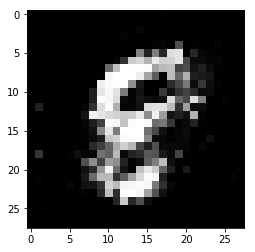

In [246]:
np.random.seed(20)
latent_samples = np.random.normal(0, 1, (nreal_images_, 128))
# generator_obj.generator.set_weights(gan_obj.generator.get_weights())
# x_generated = gan_obj.generator.predict(latent_samples)
x_generated = generator_obj.generator.predict(latent_samples)
plt.imshow(np.reshape((x_generated[2] * 127.5) + 127.5, (28, 28)), cmap='gray')
# plt.title(str(y_generated[8]))
plt.show()